In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

96.5990282938
37.4302174809
-0.999377480412


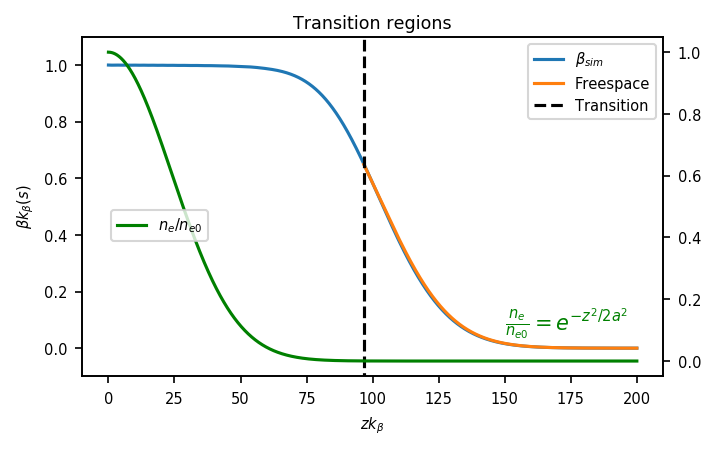

In [2]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z = np.linspace(0, 200, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

zTran = z[-2*np.array(alpha)>2]
fracTran = frac[-2*np.array(alpha)>2]
neTran = np.zeros(len(zTran))
tran1 = z[-2*np.array(alpha)<=2][-1]
betaTran = np.array(beta)[-2*np.array(alpha)<=2][-1]
alphaTran = np.array(alpha)[-2*np.array(alpha)<=2][-1]
print(tran1)
print(betaTran)
print(alphaTran)

beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta*np.sqrt(frac))
plt.plot(zTran, beta2*np.sqrt(fracTran))
plt.plot([tran1, tran1], [-1, 2], 'k--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Freespace', r'Transition'], loc=1)
plt.ylim(-0.1, 1.1)
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(150, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
plt.ylim(-0.05, 1.05)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()

96.8848242355
37.5286846524


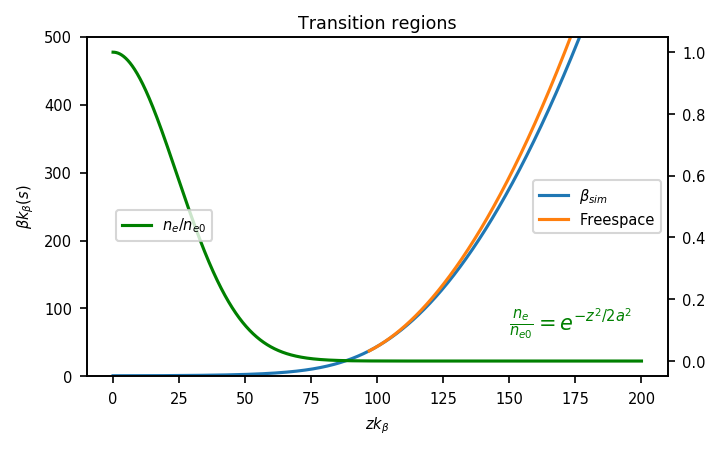

In [3]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24.062976
z = np.linspace(0, 200, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

zTran = z[-2*np.array(alpha)>2]
fracTran = frac[-2*np.array(alpha)>2]
neTran = np.zeros(len(zTran))
tran1 = z[-2*np.array(alpha)<=2][-1]
betaTran = np.array(beta)[-2*np.array(alpha)<=2][-1]
alphaTran = np.array(alpha)[-2*np.array(alpha)<=2][-1]
print(tran1)
print(betaTran)

beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(zTran, beta2)
plt.plot([tran1, tran1], [-1, 2], 'k--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Freespace'], loc=5)
plt.ylim(-0.1, 500)
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(150, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
plt.ylim(-0.05, 1.05)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()

53.5010002858
34.9875765101


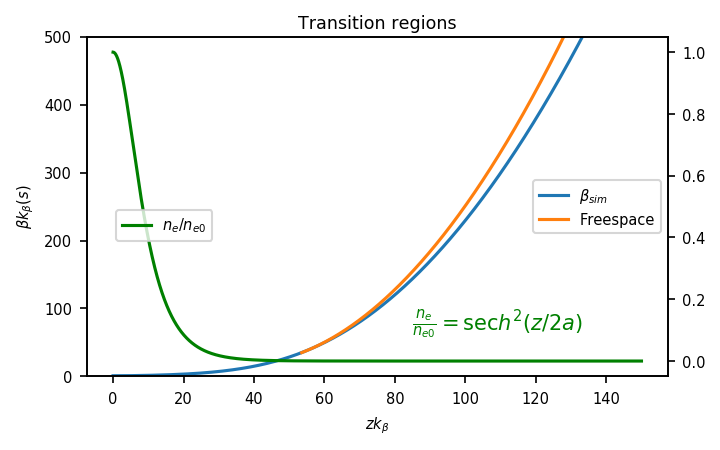

In [4]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 3.174617
z = np.linspace(0, 150, N)
frac = 2/(np.exp(z/(2*a))+np.exp(-z/(2*a)))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

zTran = z[-2*np.array(alpha)>2]
fracTran = frac[-2*np.array(alpha)>2]
neTran = np.zeros(len(zTran))
tran1 = z[-2*np.array(alpha)<=2][-1]
betaTran = np.array(beta)[-2*np.array(alpha)<=2][-1]
alphaTran = np.array(alpha)[-2*np.array(alpha)<=2][-1]
print(tran1)
print(betaTran)

beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(zTran, beta2)
plt.plot([tran1, tran1], [-1, 2], 'k--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Freespace'], loc=5)
plt.ylim(-0.1, 500)
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(85, 0.1, r'$\frac{n_e}{n_{e0}}=\sech^2(z/2a)$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
plt.ylim(-0.05, 1.05)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()

93.1694769934
30.6658929205
Betas: 20.5743841481
Actual betas: 20.400382037805134
I0: 0.00324094948685
I1: 0.017975327847
I2: 0.19168248784
Free betas: 17.816914426287855
Density: 0.000550319569932
Cutoff location: 93.1694769934


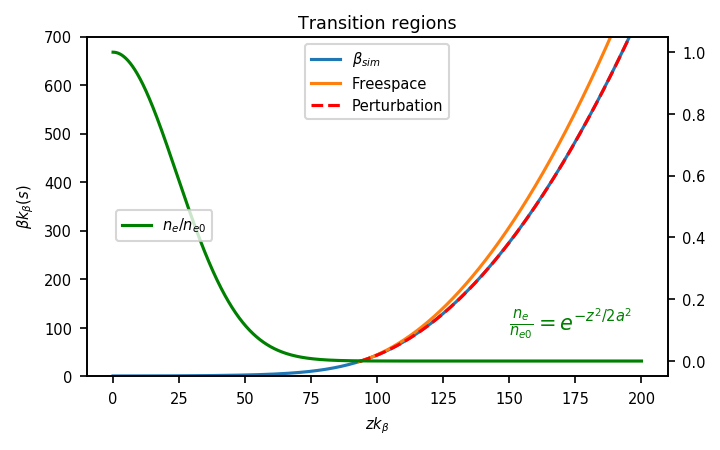

In [7]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24.062976
z = np.linspace(0, 200, N)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

cutoff = .85

zTran = z[-np.array(alpha)>cutoff]
fracTran = frac[-np.array(alpha)>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-np.array(alpha)<=cutoff][-1]
betaTran = np.array(beta)[-np.array(alpha)<=cutoff][-1]
alphaTran = np.array(alpha)[-np.array(alpha)<=cutoff][-1]
print(tran1)
print(betaTran)
zint = zTran-zTran[0]
dz = zint[1]-zint[0]
I0 = np.cumsum(fracTran)*dz
I1 = np.cumsum(zint*fracTran)*dz
I2 = np.cumsum(zint*zint*fracTran)*dz
gammaTran = (1+alphaTran**2)/betaTran
betas = 1/(gammaTran+2*(alphaTran*I0[-1]-gammaTran*I1[-1]))
print("Betas:", betas)
print("Actual betas:", beta[-1]/(alpha[-1]**2+1))
print("I0:", I0[-1])
print("I1:", I1[-1])
print("I2:", I2[-1])
M11 = 1-I0*zint+I1
M12 = zint-I1*zint+I2
betaPer = M11**2*betaTran - 2*M11*M12*alphaTran + M12**2*gammaTran


beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)
print("Free betas:", beta2[-1]/(alpha2[-1]**2+1))
print('Density:', fracTran[0])
print("Cutoff location:", tran1)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(zTran, beta2)
plt.plot(zTran, betaPer, 'r--')
plt.plot([tran1, tran1], [-1, 2], 'k--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Freespace', 'Perturbation'], loc=9)
plt.ylim(-0.1, 700)
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(150, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
#plt.yscale('log')
plt.ylim(-0.05, 1.05)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()